# SQLAlchemy Homework - Trip Planner

### Import Dependencies 

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func 


## Step 1 - Climate Analysis and Exploration


### Reflect Tables into SQLAlchemy ORM

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

### Precipitation Analysis

In [7]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Retrieving the date of the last data points. 
final_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(final_date)

# Use datetime to minus a year from final_date to find the start_date for our query range. 
start_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print(start_date)

# Perform a query to retrieve the data and precipitation scores
query_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(query_results, columns=['Date','Precipitation'])
prcp_df = prcp_df.set_index("Date")

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(["Date"])
prcp_df.head()

('2017-08-23',)
2016-08-23


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


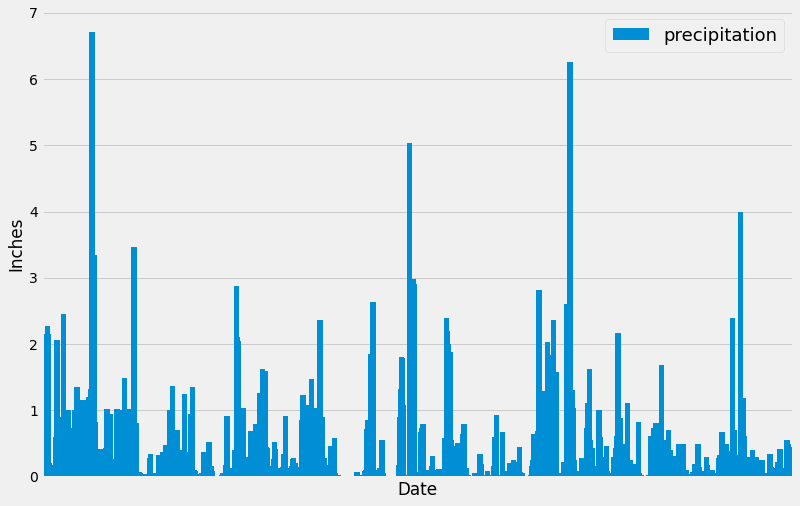

In [8]:
# Use Pandas Plotting with Matplotlib to plot the data
ax= prcp_df.plot.bar(xticks=[], figsize=(12,8), width=16)
ax.set_ylabel("Inches")
plt.legend(['precipitation'], fontsize=18)
plt.show()
# Add tick labels

In [9]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = prcp_df.describe()
summary_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [10]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [11]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [12]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

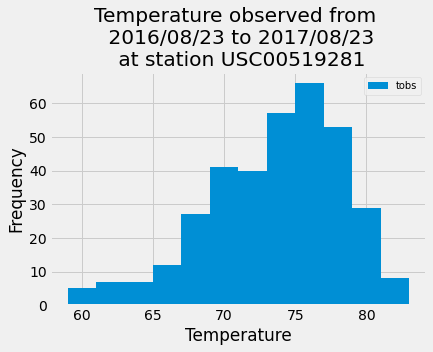

In [13]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_temp_obs = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.date >= start_date)\
    .filter(Measurement.station == 'USC00519281').all()
    
most_temp_obs_df = pd.DataFrame(most_temp_obs)
most_temp_obs_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature observed from \n 2016/08/23 to 2017/08/23\n at station USC00519281")
plt.legend(['tobs'], fontsize=10)
plt.show()